### Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Import dataset

In [3]:
data = pd.read_csv("D:\\DATA_science\\Data_sets\\Neural Network\\gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


### Split input and output variable

In [4]:
features = data[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']]
target = data[['TEY']]

### Split dataset into train and test

In [5]:
train_features,test_features,train_target,test_target = train_test_split(features,target)

### Apply the model on train dataset

In [6]:
no_features_columns = len(train_features.keys())
no_target_columns = 1
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=[no_features_columns]),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(no_target_columns)
])

In [38]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
             loss='mean_squared_error',
             metrics=['mean_squared_error'])

In [73]:
history = model.fit(train_features, train_target, validation_split=0.10, epochs=45, batch_size=20)

Epoch 1/45
508/508 [==============================] - 0s 897us/step - loss: 1.8237 - mean_squared_error: 1.8237 - val_loss: 0.9145 - val_mean_squared_error: 0.9145
Epoch 2/45
508/508 [==============================] - 0s 804us/step - loss: 1.8166 - mean_squared_error: 1.8166 - val_loss: 0.6429 - val_mean_squared_error: 0.6429
Epoch 3/45
508/508 [==============================] - 0s 957us/step - loss: 1.7680 - mean_squared_error: 1.7680 - val_loss: 0.7081 - val_mean_squared_error: 0.7081
Epoch 4/45
508/508 [==============================] - 0s 944us/step - loss: 1.7969 - mean_squared_error: 1.7969 - val_loss: 1.8643 - val_mean_squared_error: 1.8643
Epoch 5/45
508/508 [==============================] - 0s 829us/step - loss: 1.7937 - mean_squared_error: 1.7937 - val_loss: 0.7189 - val_mean_squared_error: 0.7189
Epoch 6/45
508/508 [==============================] - 0s 804us/step - loss: 1.7836 - mean_squared_error: 1.7836 - val_loss: 1.0597 - val_mean_squared_error: 1.0597
Epoch 7/45
508/5

In [74]:
# list all data in history
model.history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

### Summarize history

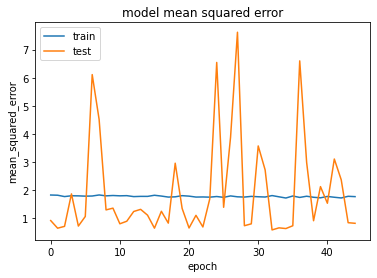

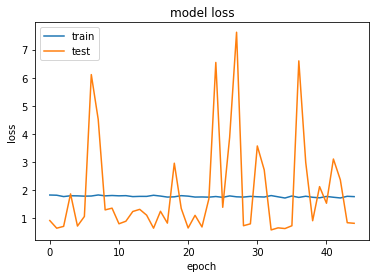

In [75]:
# summarize history for mean_squared_error
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predictions for test dataset

In [76]:
test_predictions = model.predict(test_features).flatten()
results_df = pd.DataFrame({'Predicted TEY': test_predictions,'Actual ':test_target.values.flatten()})
results_df.head(10)

,Predicted TEY,Actual
0,131.917648,130.21
1,133.404343,133.98
2,130.656662,129.96
3,133.897812,134.50
4,153.784943,155.97
5,109.807861,109.65
6,110.319382,110.76
7,142.458908,143.59
8,110.808151,112.09
9,135.242233,133.68


### Predictions for train dataset

In [77]:
train_predictions = model.predict(train_features).flatten()
results_df = pd.DataFrame({'Predicted TEY': train_predictions,'Actual TEY':train_target.values.flatten()})
results_df.head(10)

,Predicted TEY,Actual TEY
0,110.245766,111.75
1,116.599838,117.01
2,133.968460,134.78
3,132.754898,132.83
4,133.415863,134.61
5,133.305252,133.79
6,150.028778,151.23
7,103.855713,103.81
8,116.970871,116.71
9,119.907906,120.26


### Error for train dataset

In [78]:
# evaulate the model
scores = model.evaluate(train_features, train_target)
#print(scores)
print( (model.metrics_names[1], scores[1]))

353/353 [==============================] - 0s 545us/step - loss: 0.8782 - mean_squared_error: 0.8782
('mean_squared_error', 0.8781819939613342)


### Error for test Dataset

In [79]:
# evaulate the model
scores = model.evaluate(test_features, test_target)
#print(scores)
print( (model.metrics_names[1], scores[1]))

118/118 [==============================] - 0s 616us/step - loss: 0.9239 - mean_squared_error: 0.9239
('mean_squared_error', 0.9239481091499329)


## Conclusion
### Here we can see that, we got very low error for 45 epochs. Error for train and test dataset is nearly equal. So we can conclude that our model predict much closer values for  output variable as per actual values.